In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Read input images and assign labels based on folder names
print(os.listdir("/content/drive/MyDrive/all_images2/train_test_split/"))

['test', 'train', 'validation']


In [10]:


SIZE = 256  #Resize images #224

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("/content/drive/MyDrive/all_images2/train_test_split/train/*"):
    # print(directory_path)
    label = directory_path.split("\\")[-1]
    # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):#".jpg"
        # print(img_path)
        # img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        # img = cv2.resize(img, (SIZE, SIZE))
        # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        # train_images.append(img)
        train_labels.append(label)
print(train_labels)
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
# train_labels

['/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/COVID', '/content/drive/MyDrive/all_images2/train_test_split/train/CO

In [11]:
type(train_labels)

numpy.ndarray

In [ ]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/all_images2/train_test_split/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):#".jpg"
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [13]:
train_labels

array(['/content/drive/MyDrive/all_images2/train_test_split/train/COVID',
       '/content/drive/MyDrive/all_images2/train_test_split/train/COVID',
       '/content/drive/MyDrive/all_images2/train_test_split/train/COVID',
       ...,
       '/content/drive/MyDrive/all_images2/train_test_split/train/Viral Pneumonia',
       '/content/drive/MyDrive/all_images2/train_test_split/train/Viral Pneumonia',
       '/content/drive/MyDrive/all_images2/train_test_split/train/Viral Pneumonia'],
      dtype='<U73')

In [14]:
# test_labels

In [15]:
# train_path  = "./all_images/train_test_split/train"
# valid_path  = "./all_images/train_test_split/validation"
# test_path   = "./all_images/train_test_split/test"
train_path  = "/content/drive/MyDrive/all_images2/train_test_split/train"
valid_path  = "/content/drive/MyDrive/all_images2/train_test_split/validation"
test_path   = "/content/drive/MyDrive/all_images2/train_test_split/test"

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [17]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 14814 images belonging to 4 classes.


In [18]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 4232 images belonging to 4 classes.


In [19]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 2119 images belonging to 4 classes.


In [20]:
train.class_indices

{'COVID': 0, 'Lung Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [21]:
class_type = {0:'COVID', 1:'Lung Opacity', 2:'Normal', 3:'Viral Pneumonia'}

In [22]:
t_img , label = train.next()

In [23]:
train

In [24]:
def plotImages(img_arr, label):
  
  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


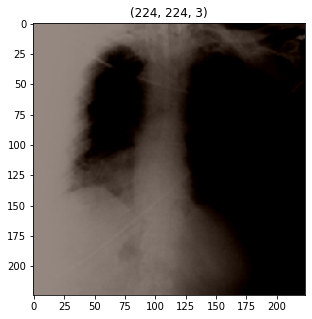

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


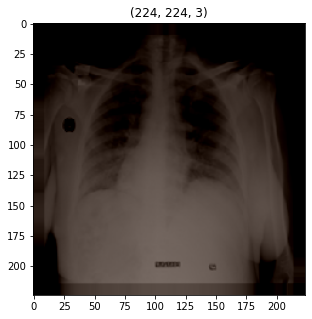

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


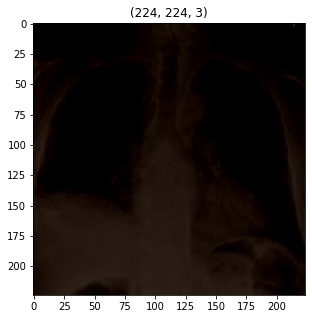

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


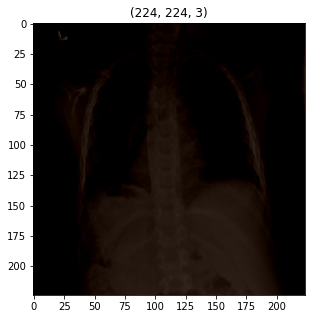

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


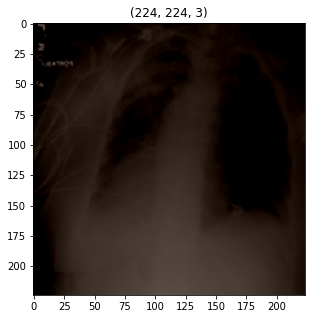

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


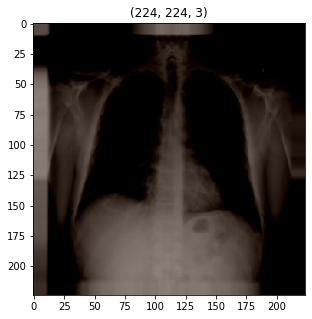

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


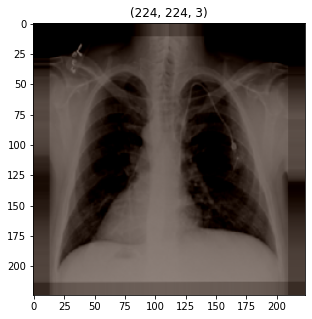

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


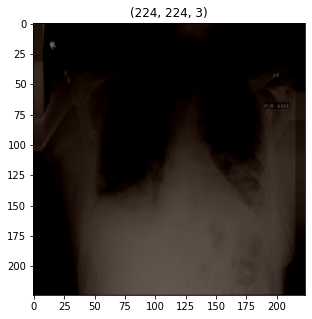

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


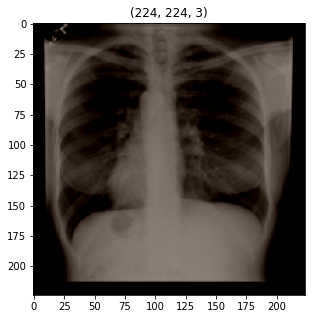

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


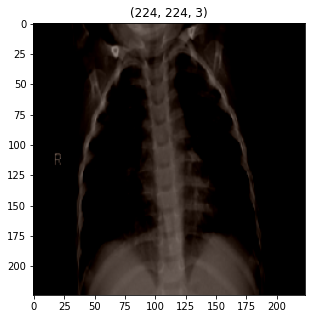

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


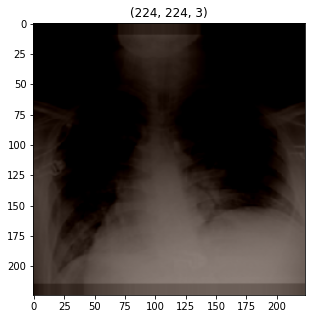

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


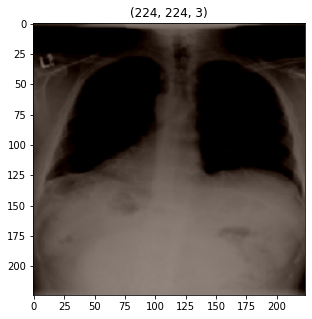

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


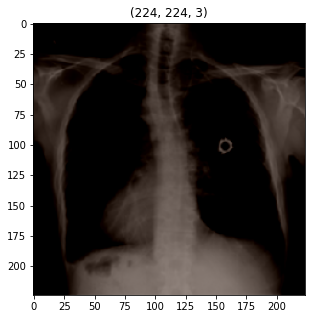

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


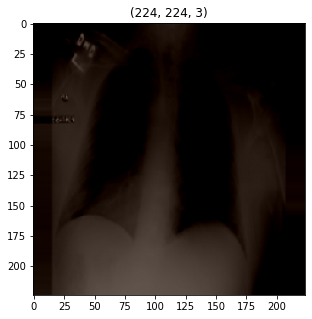

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


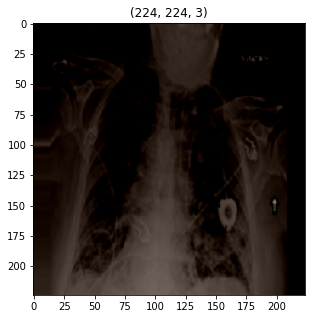

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


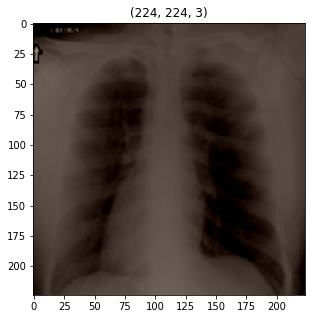

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


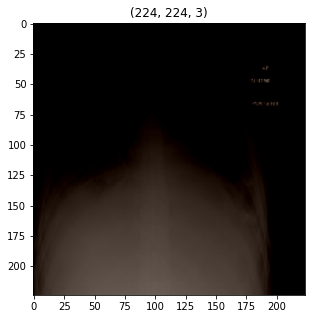

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


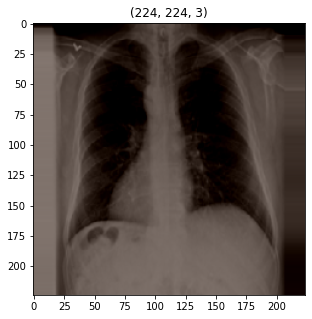

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


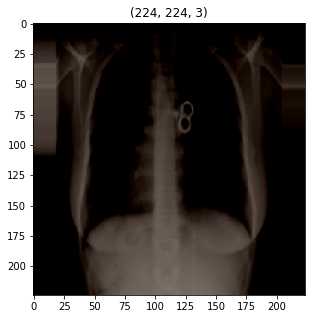

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


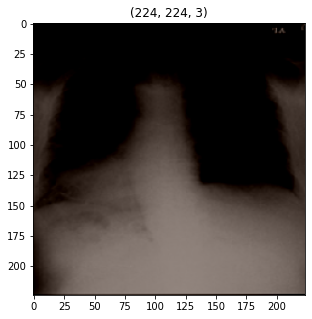

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


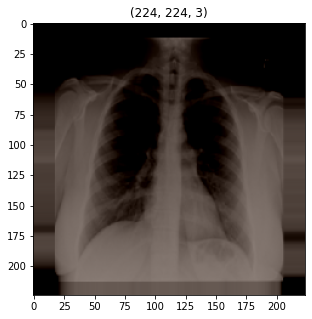

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


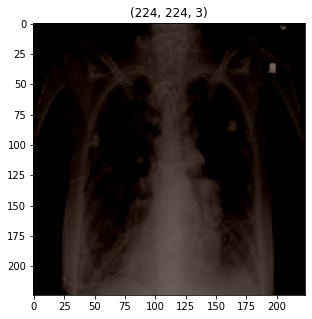

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


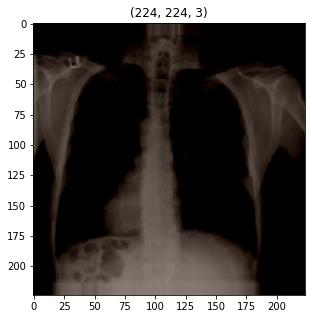

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


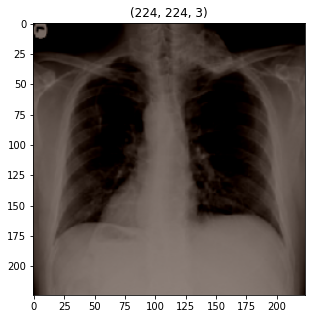

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


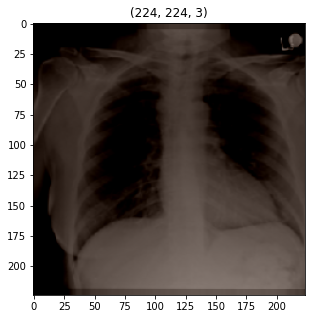

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


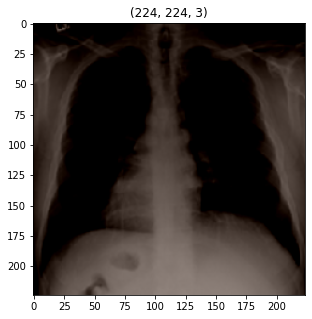

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


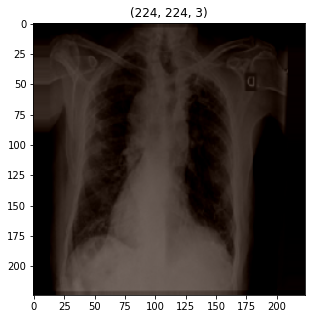

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


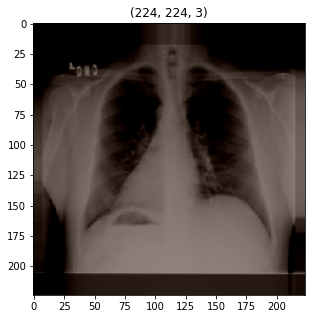

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


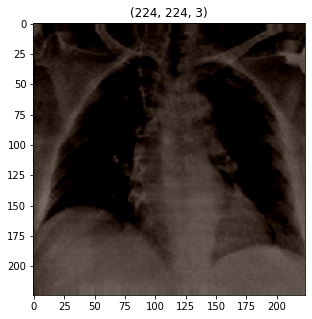

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


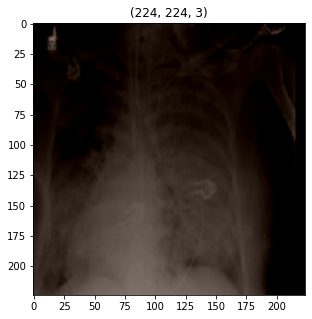

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


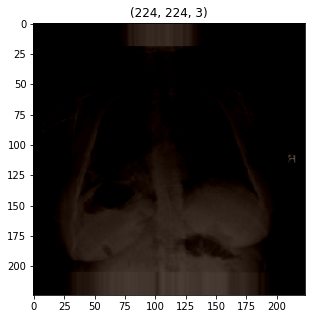

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


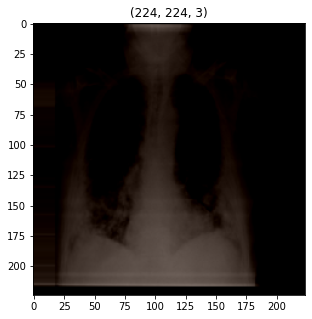

In [25]:
plotImages(t_img, label)

In [26]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(test_labels)
# test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [27]:
train_labels_encoded

array([0, 0, 0, ..., 3, 3, 3])

In [28]:
# #Split data into test and train datasets (already split but assigning to meaningful convention)
# x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
# # x_train, y_train = train_images, train_labels_encoded

In [29]:
# ###################################################################
# # Normalize pixel values to between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0
# # x_train = x_train / 255.0

# #One hot encode y values for neural network. 
# from keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

# #############################

In [30]:
SIZE = 224
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
train
t_img , label = train.next()
len(t_img)

32

In [32]:
# type(label)
import numpy as np
lb=label
class_label = y_train = np.where(lb==1)[1] #np.where(a)[1], np.where(a)[2] # for 

In [33]:
y_train

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 1, 1, 2, 2, 2])

In [34]:
# #Encode labels from text to integers.
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(class_label)
# train_labels_encoded = le.transform(class_label)

In [35]:
# You can do that using np.where as follows:

# import numpy as np
# a=np.array([[ 0.,  1.,  0.],
#             [ 1.,  0.,  0.],
#             [ 0.,  0.,  1.]])
# np.where(a==1)[1]
# This prints array([1, 0, 2], dtype=int64). This works since np.where(a==1)[1] returns the column indices of the 1's, which are exactly the labels.

# In addition, since a is a 0,1-matrix, you can also replace np.where(a==1)[1] with just np.where(a)[1].

# Update: The following solution should work with your format:

# l=[np.array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.]]),
#  np.array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
#  np.array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.]]),
#  np.array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
#  np.array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.]]),
#  np.array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.]]),
#  np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])]
# a=np.array(l)

# np.where(a)[2]
# This prints

# array([0, 2, 1, 4, 4, 5, 6], dtype=int64)
# Alternativaly, you could use the original solution together with @ml4294's comment.

In [36]:
label

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [37]:
#Now, let us use features from convolutional network for RF
x_train = t_img#train
feature_extractor=VGG_model.predict(x_train)#x_train[0])

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF

In [38]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
test
t_img2 , label2 = test.next()
x_test = t_img2
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [41]:
# RF_model.summary()

In [42]:
VGG_model.save("vgg16+rf__vgg16_weights.h5")

In [46]:
import pickle

# save the model to disk
filename = 'finalized_model_vgg+rf_both_weights.pkl' #'finalized_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))

In [47]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [48]:
# type(label2)
import numpy as np
lb2=label2
y_test = np.where(lb2==1)[1] #np.where(a)[1], np.where(a)[2] # for 

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
len(label2)

32

In [51]:
prediction_RF = RF_model.predict(X_test_features)
print(prediction_RF)

[2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2]


In [52]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
X_test_features

array([[0.68678623, 0.        , 0.        , ..., 0.01109585, 0.22402072,
        0.        ],
       [0.25022557, 0.        , 0.03219873, ..., 0.        , 0.5136643 ,
        0.        ],
       [0.5786673 , 0.        , 0.12678435, ..., 0.        , 0.5285596 ,
        0.        ],
       ...,
       [1.0105766 , 0.        , 0.        , ..., 0.        , 0.6731195 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.58141726,
        0.        ],
       [0.5727403 , 0.        , 0.        , ..., 0.        , 0.4680197 ,
        0.        ]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy =  0.0
[[ 0  6 26]
 [ 0  0  0]
 [ 0  0  0]]
The prediction for this image is:  2
The actual label for this image is:  0


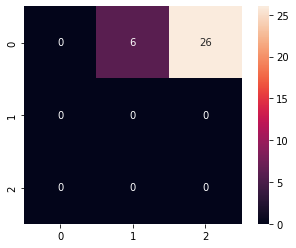

In [54]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
# prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))#test_labels,

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_RF)#test_labels,
print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
# prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])#test_labels[n]